# Challenge
> Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
>Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.
>People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
#!pip install kaggle
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
#!export KAGGLE_USERNAME=oigorvianna
#!export KAGGLE_KEY=b
#!kaggle datasets [-h]

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
#-- Install and Import a library to read zip file
#!pip install os-win
import os
import zipfile

In [3]:
#-- Extract tha data    
with zipfile.ZipFile("heart-failure-clinical-data.zip","r") as z:
    z.extractall()


# 1. Loading the main Libraries
> Numpy, Pandas, matplot, seaborn

In [4]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load dataset and read
> Understand the variables

We have some **Continuous variables**:
 1. age
 2. creatinine_phosphokinase
 3. ejection_fraction
 4. platelets
 5. serum_creatinine
 6. serum_sodium
 7. time
 
And **Categorical variables**:
 1. anaemia
 2. diabetes
 3. high_blood_pressure
 4. sex
 5. smoking
 6. death_event

In [5]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Observing the distribution of the continous variables
We can see that creatinine_phosphokinase, platelers, serum_creatinine and serum_sodium has a grouping

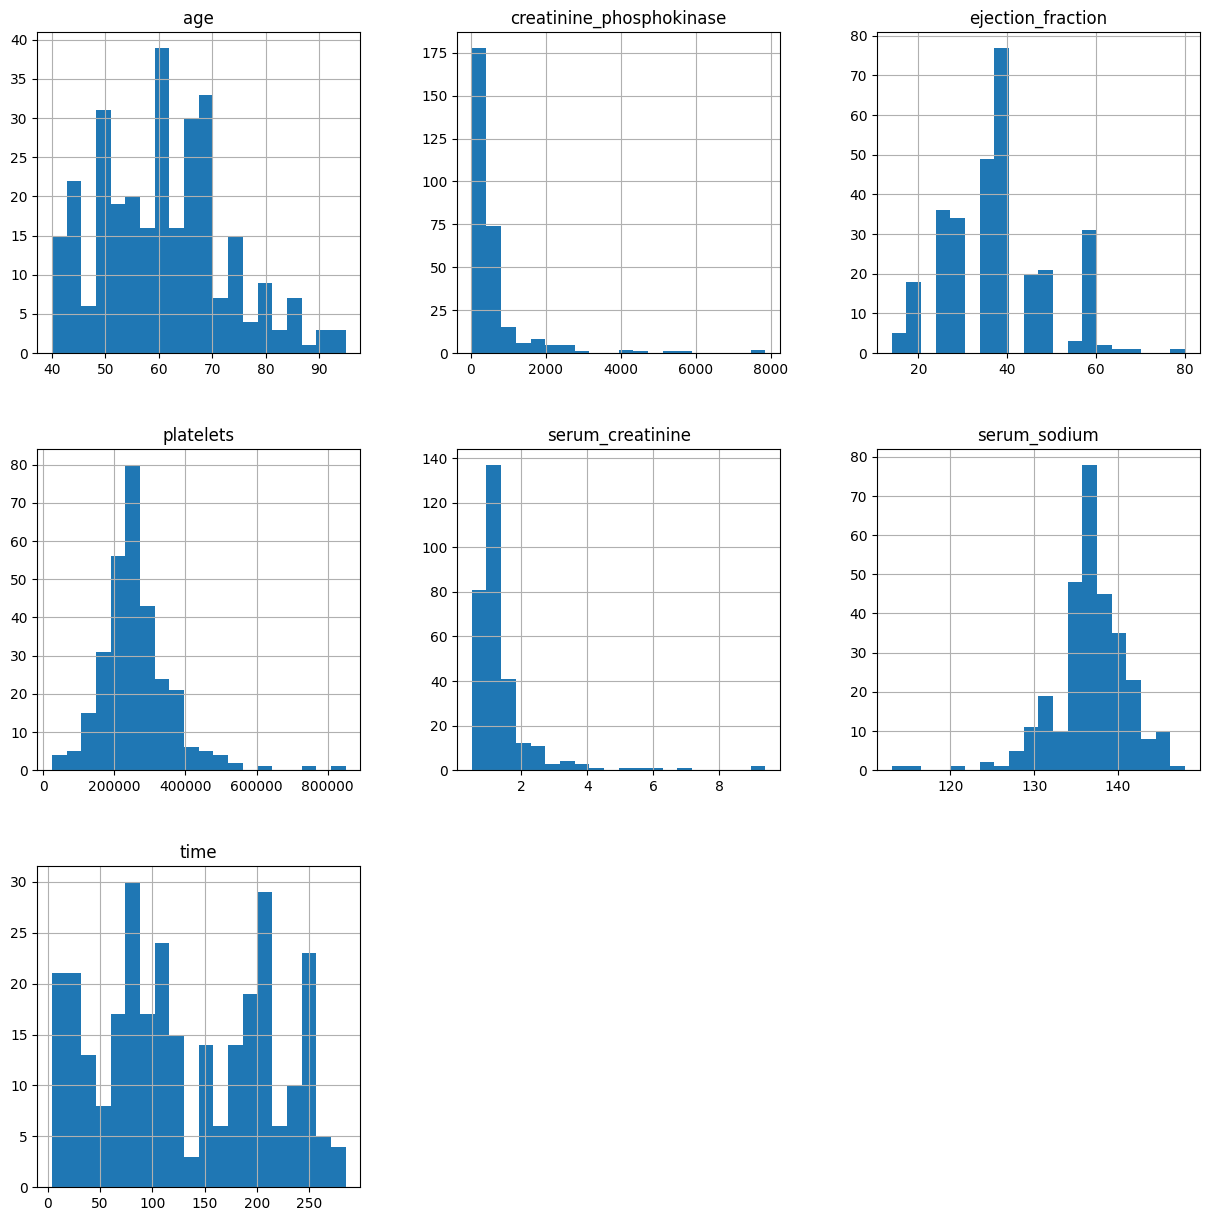

In [6]:
#-- starting observing the distribution of the continuos variables
df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']].hist(bins=20,
                                                                                                                          figsize=(15,15))
plt.show()

In [7]:
continous_var = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[continous_var].describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


# How these variables relates to the 'DEATH_EVENT'? 
Lets create two new columns to see death events like Yes or No and Sex like Male or Female.

With a pairplot we can show the relationship between each of the continuos variables with the rest of them

In [8]:
df['sex_description'] = df['sex'].replace({1: "Male", 0: "Female"})
df['death'] = df['DEATH_EVENT'].replace({1: "yes", 0: "no"})

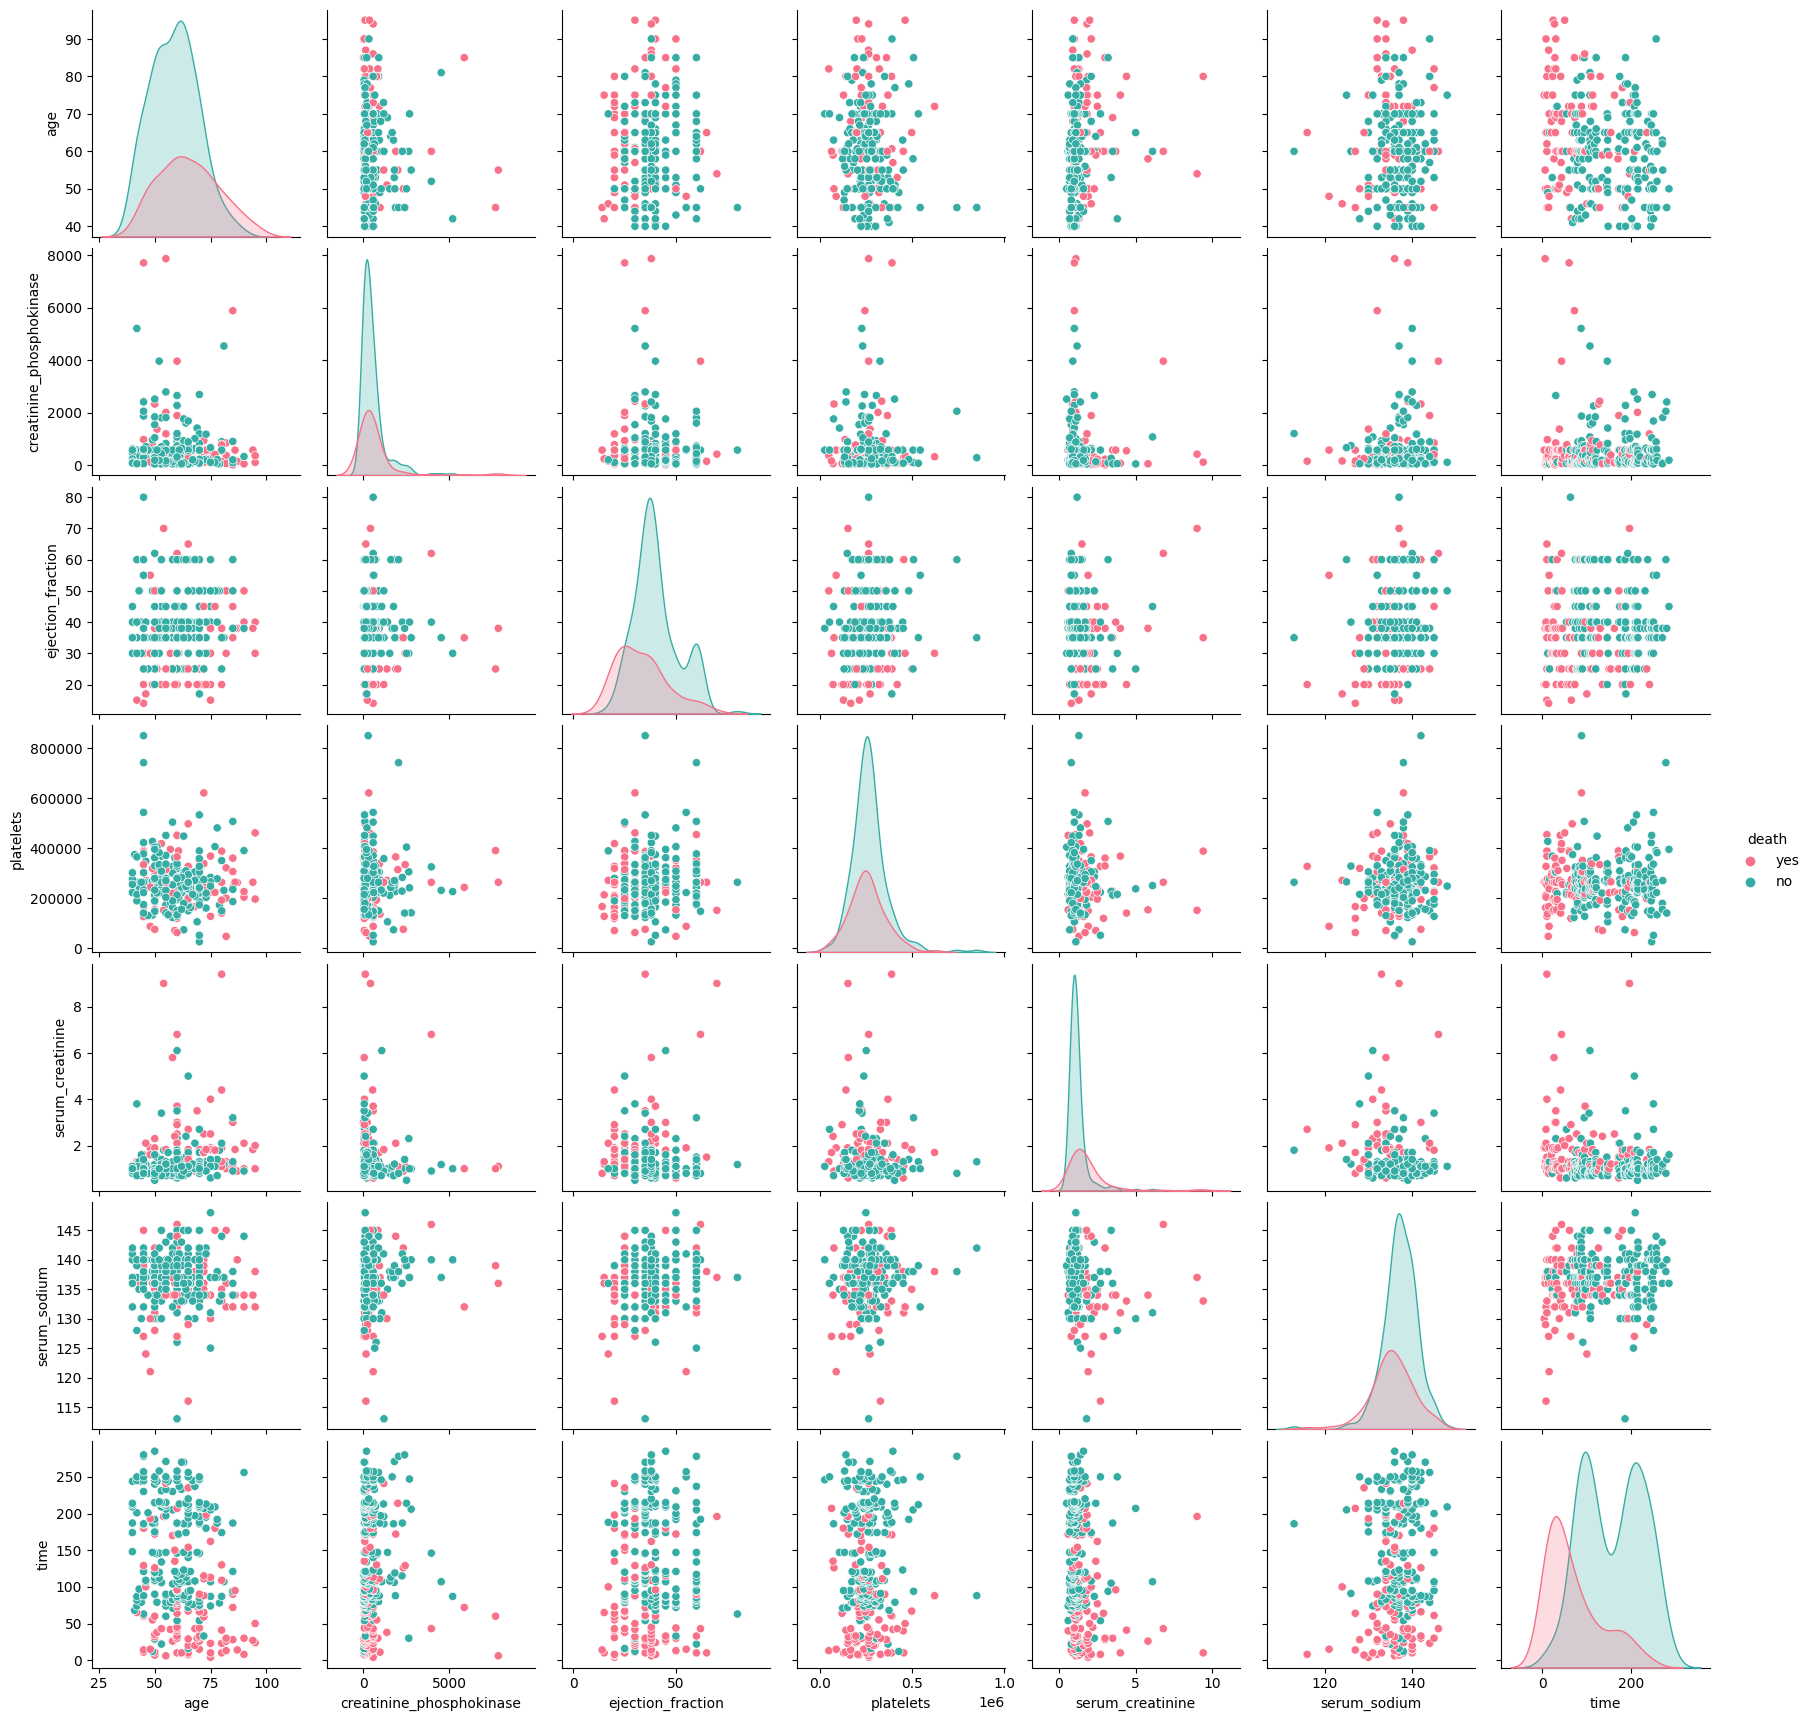

In [9]:
sns.pairplot(df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'death']],
            hue = 'death',
            diag_kind = 'kde',
            kind = 'scatter',
            palette = 'husl')
plt.show()

# How each these variables is segregated between death events?
Here, red color show the death event and the green color represents no death.
Besides, te scatter plot, the density plot between shows a clear distribution of data for death events e no death events.

C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\distributions.py:1708: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.

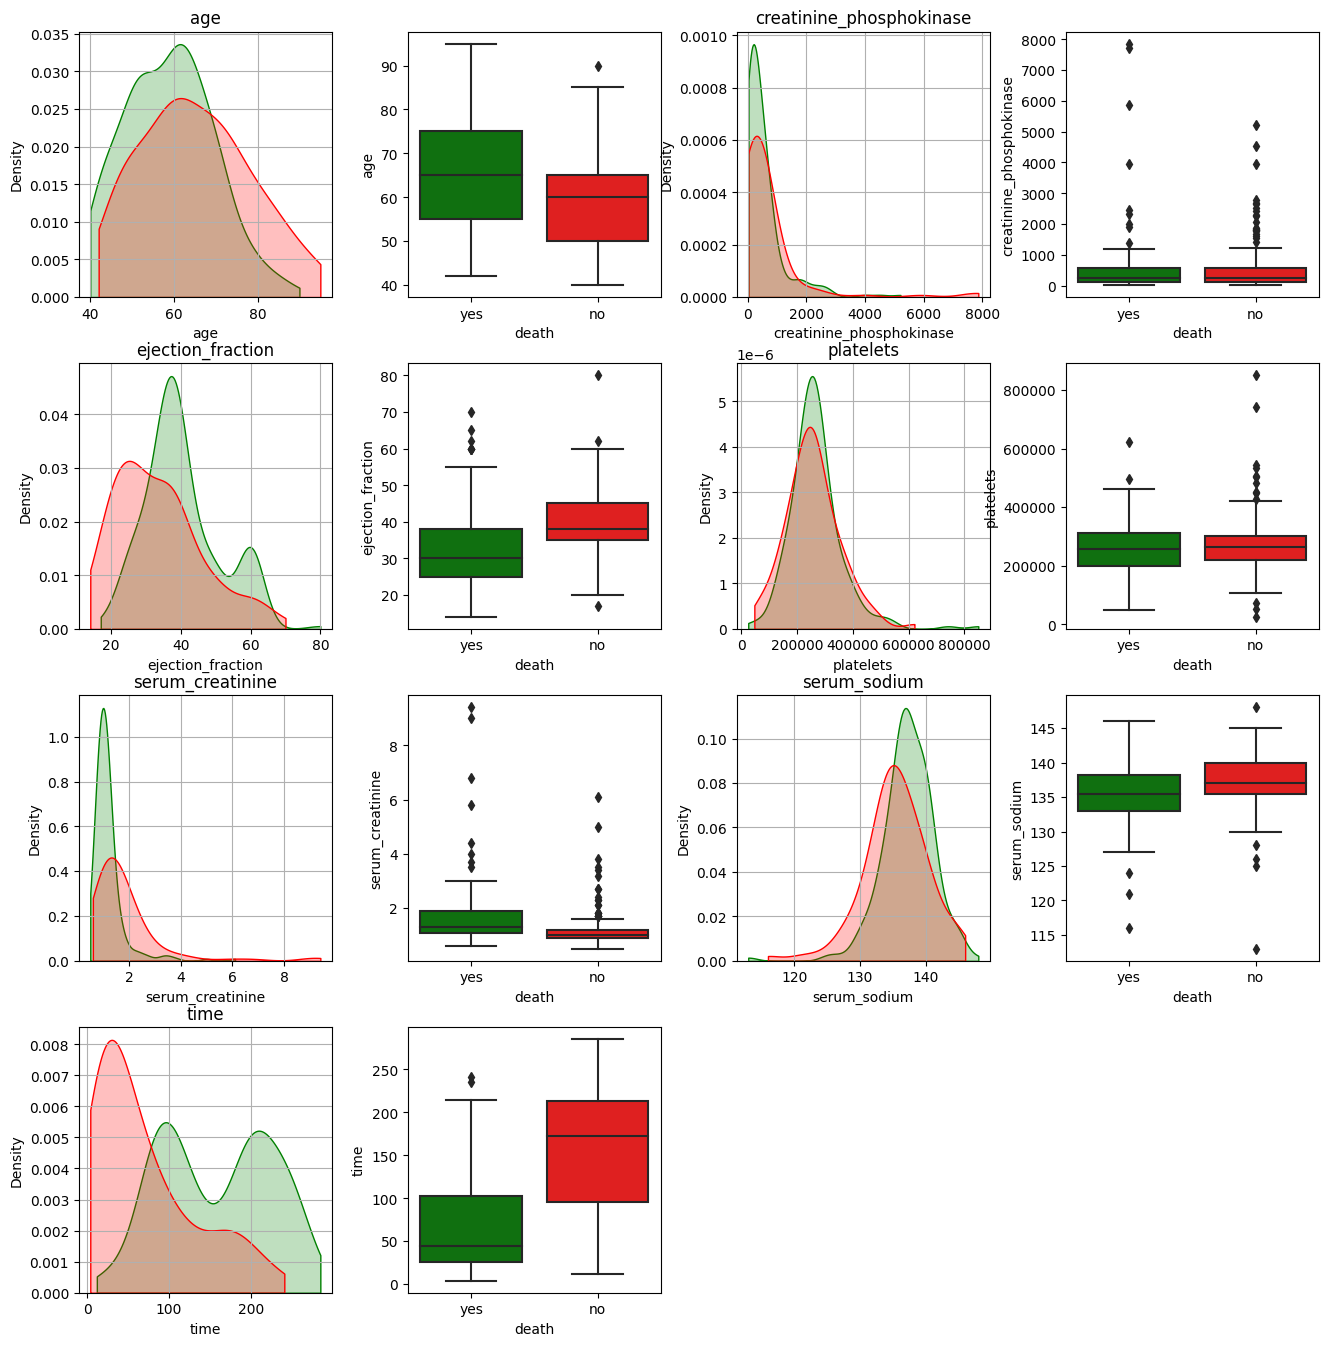

In [10]:
plt.figure(
    figsize=(16,25)
)

for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["death"]=='no', col], label="alive", color = "green", shade=True, kernel='gau', cut=0)
    sns.kdeplot(df.loc[df["death"]=='yes', col], label="dead",  color = "red", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = df, x="death", palette = ["green", "red"])

plt.show()

In [11]:
y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg({np.mean, np.median})
y

<ipython-input-11-f358e2c812ee>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y = df.groupby("death")["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"].agg({np.mean, np.median})


creatinine_phosphokinase        ejection_fraction             platelets  \
                          mean median              mean median           mean   
death                                                                           
no                  540.054187  245.0          40.26601   38.0  266657.489901   
yes                 670.197917  259.0          33.46875   30.0  256381.044792   

                serum_creatinine        serum_sodium               time         
         median             mean median         mean median        mean median  
death                                                                           
no     263000.0         1.184877    1.0   137.216749  137.0  158.339901  172.0  
yes    258500.0         1.835833    1.3   135.375000  135.5   70.885417   44.5

As saw in previous distribution and density plots, not all variables are normally distributed. So mean, alone will not be representative.
looks like the 'time' variable is very different between the death events.

# High blood pressure plays any role in death by gender?
The differences is more in high blood pressure conditions than in gender. In female population, 28% of deaths happened in females with no high blood pressure and 39% of death happened in females with high blood pressure.

In [12]:
df.groupby(['sex_description', 'high_blood_pressure', 'death']).size().unstack().fillna(0).apply(lambda x: round((x/x.sum()*100)), axis=1)

death                                  no   yes
sex_description high_blood_pressure            
Female          0                    72.0  28.0
                1                    61.0  39.0
Male            0                    70.0  30.0
                1                    64.0  36.0

# Lets take a look at binary "Categorical" variables

In [31]:
binary_var = ['anaemia', 'diabetes', 'high_blood_pressure',
             'sex_description', 'smoking']
plt.figure(figsize=(13, 9))
for i, var in enumerate(binary_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= df, x = var, hue="death", palette = ['gray', "coral"])
plt.show()

ValueError: Could not interpret input 'anaemia'

The dataset is definitly not balanced. There is a difference in the number of death events beetween any other categorical variable. But, what we can se is a differente proportional at death in high_blood_pressure. 

# Looking to proportional by categorical variable

In [ ]:
x = pd.crosstab(df['sex_description'], df['death'])
x.apply(lambda z: round((z/z.sum()*100)), axis=1)

The deaths in male and female population both are 32% (rounded). So they are same.
## Anaemia vs Death

In [ ]:
x = pd.crosstab(df['anaemia'], df['death'])
x.apply(lambda z: round((z/z.sum()*100)), axis=1)

The proportion of death for people with anemia is a bit higher

## Diabetes vs Death

In [16]:
x = pd.crosstab(df['diabetes'], df['death'])
x.apply(lambda z: round((z/z.sum()*100)), axis=1)

death,no,yes
diabetes,,
0,68.0,32.0
1,68.0,32.0


The deaths in population with diabetes and without diabetes is the same.

## Smoking vs Death

In [17]:
x = pd.crosstab(df['smoking'], df['death'])
x.apply(lambda z: round((z/z.sum()*100)), axis=1)

death,no,yes
smoking,,
0,67.0,33.0
1,69.0,31.0


The proportion of death for people with smoking and with no smoking habit are almost the same

## High Blood Pressure vs Death

In [18]:
x = pd.crosstab(df['high_blood_pressure'], df['death'])
x.apply(lambda z: round((z/z.sum()*100)), axis=1)

death,no,yes
high_blood_pressure,,
0,71.0,29.0
1,63.0,37.0


As we saw before, the proportional of death if higher in people with hugh blood pressure.

# Has somes habits diference?
Lets see the distribution of 'time' across smoking and no smoking males and females.

C:\Users\oigor\anaconda3\envs\EDA-Study\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


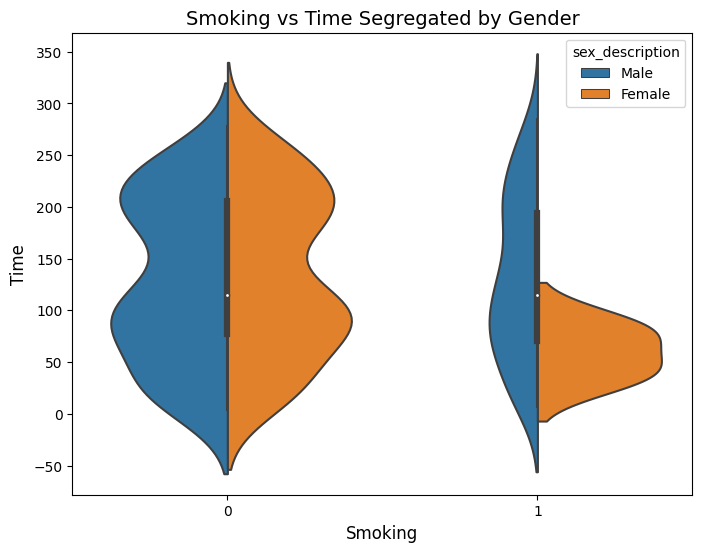

In [19]:
plt.figure(figsize=(8, 6))
a = sns.violinplot(df.smoking, df.time, hue=df.sex_description, split=True)
plt.title("Smoking vs Time Segregated by Gender", fontsize=14)
plt.xlabel("Smoking", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.show()

# Is there some relationship between 'ejection_fraction' and 'time'?

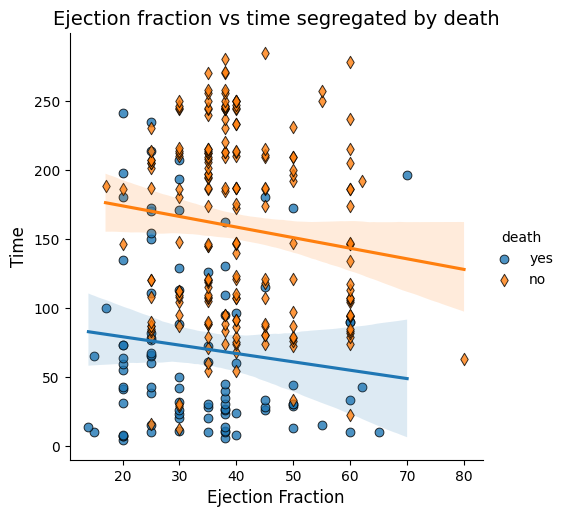

In [22]:
sns.lmplot(x="ejection_fraction", y="time", 
           hue="death", 
           markers=['o','d'], data=df, scatter_kws=dict(s=40, linewidths=0.7,
                                            edgecolors='black'))
plt.xlabel("Ejection Fraction", fontsize=12)
plt.ylabel("Time", fontsize=12)
plt.title("Ejection fraction vs time segregated by death", fontsize=14)
plt.show()

# How 'time' changes with 'age'
The regression line for the male population is much steeper, higher age the time goes down

<Figure size 1600x640 with 0 Axes>

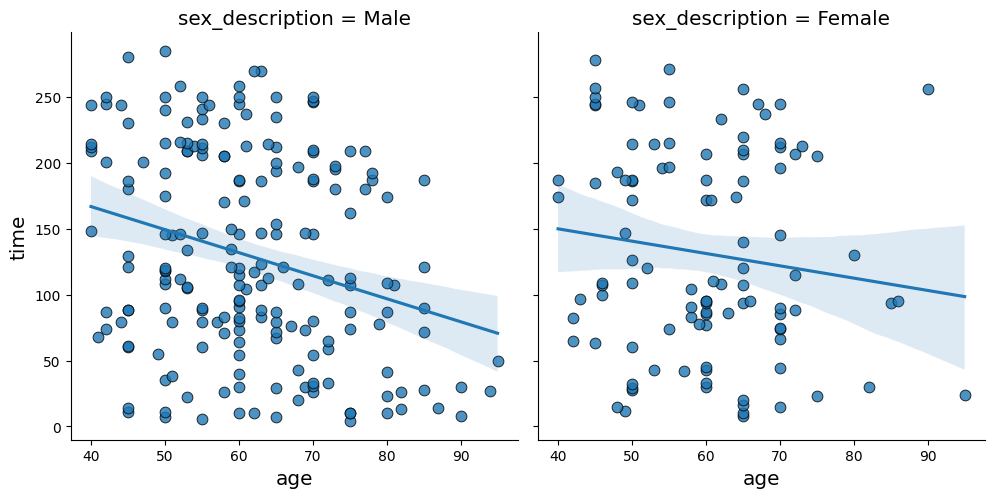

In [28]:
fig = plt.figure(figsize=(20, 8), dpi=80)
g = sns.lmplot(x='age', y='time', 
               data = df, 
               robust = True,
              palette="Set1", col="sex_description",
              scatter_kws=dict(s=60, linewidths=0.7, edgecolors="black"))
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize='x-large')
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
    
plt.show()

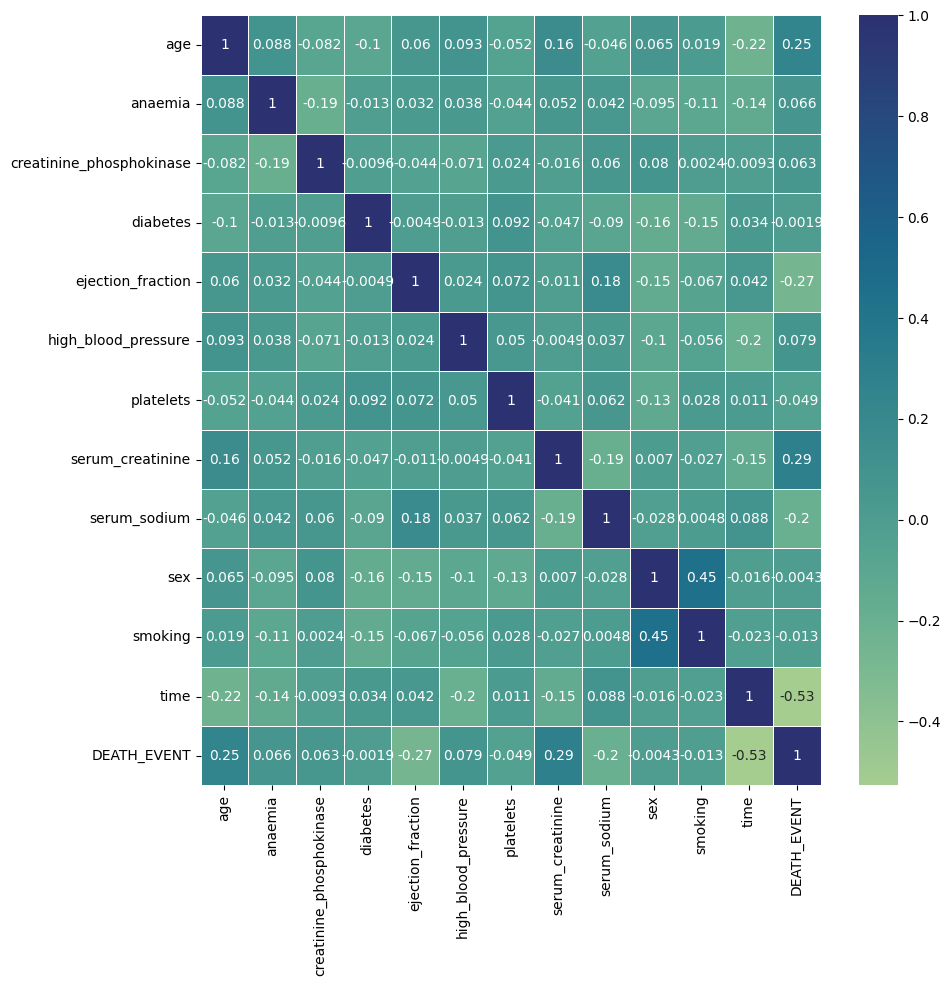

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap="crest")
plt.show()

# Prediction of Death
Lets import a machine learning model from scikit_learn library to train.
> #Data preparation

- We have to remove all no numeric data from dataset
- Drop null values
- Remove some feature that is a low correlation with death


In [30]:
df = df.drop(columns=['sex_description', 'death'])
df = df.dropna()
df = df.drop(columns=['anaemia',
                     'diabetes',
                     'sex',
                     'smoking',
                     'creatinine_phosphokinase'])

We have to nomalize the dataset. Some variables has a a biggest range than others

In [32]:
df2 = df

continous_var = ['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

for i in continous_var:
    df2[i] = df2[i]/max(df2[i])

In [33]:
# save output variable
y = df2['DEATH_EVENT']

# SET INPUT VARIABLES
X = df2.drop(columns=['DEATH_EVENT'])

In [35]:
# SPLIT THE DATASET AT A TRAIN AND TEST
#!pip install sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=22)

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)


In [42]:
# Train and test a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf_tree = DecisionTreeClassifier(random_state=21, max_depth = 7, max_leaf_nodes=6).fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred,pos_label=0))
print("Recall:",metrics.recall_score(y_test,y_pred,pos_label=0))
print("F Score:",metrics.f1_score(y_test,y_pred,pos_label=0))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_pred))

Accuracy: 0.8133333333333334
Precision: 0.9361702127659575
Recall: 0.8
F Score: 0.8627450980392157
Confusion Matrix:
 [[44 11]
 [ 3 17]]
